##1. Download Dataset

Download the ucmerced landuse dataset with 21 classes where each class has 100 images. The 21 classes are:
* agricultural
* airplane
* baseballdiamond
* beach
* buildings
* chaparral
* denseresidential
* forest
* freeway
* golf course
* harbor
* intersection
* mediumresidential
* mobilehomepark
* overpass
* parking lot
* river
* runway
* sparseresidential
* storage tanks
* tennis court

Where each image has a size of 256x256 RGB pixels.

In [1]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2021-10-01 13:51:13--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  48.7MB/s    in 10s     

2021-10-01 13:51:23 (30.6 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



##2. Mount Google Drive

Mount colab to google drive to save and load trained model.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3. Import Important Library

In [4]:
import os
from skimage.io import imread, imsave
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import cv2
import matplotlib.pyplot as plt

##4. Extract Dataset

Make data directory for the extracted dataset

In [5]:
try:
  os.mkdir('data')
except:
  print("Error, there is already a 'data' folder")

Extract dataset to '/content/data'

In [6]:
import zipfile
with zipfile.ZipFile("/content/UCMerced_LandUse.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

Get the label from the dataset

In [7]:
labels = os.listdir("/content/UCMerced_LandUse/Images")
labels.sort()
labels

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

##5. Divide Dataset into Training, Validation, Testing

Randomly selects images from the dataset and divides them into Train, Validation, and Test with a ratio of 80:10:10

In [8]:
def complement (a,b):
    f2=[]
    for x in a:
        x=os.path.splitext(x)[0]+'.tif'
        if x not in b:
            f2.append(x)
    return (f2)

In [9]:
train_data_size=80
validate_data_size=10
test_data_size=10
for j in labels:
    path=os.path.join('/content/UCMerced_LandUse/Images',j)
    path1_train=os.path.join('data','train',j)
    path1_validate=os.path.join('data','validation',j)
    path1_test=os.path.join('data','test',j)
    
    try:
      shutil.rmtree(path1_train)
      os.makedirs(path1_train)
      shutil.rmtree(path1_validate)
      os.makedirs(path1_validate)
      shutil.rmtree(path1_test) 
      os.makedirs(path1_test) 
    except:
      os.makedirs(path1_train) 
      os.makedirs(path1_validate) 
      os.makedirs(path1_test) 
    
    
    files1= os.listdir(path)
    files1=files1[1:len(files1)]
    files1= np.random.permutation(files1)
    for i in range(0,train_data_size):
        file=os.path.join(path,files1[i])
        img1=imread(file)
        n=os.path.splitext(file)
        n=n[0].split('/')
        n1=os.path.join(path1_train, n[-1] +'.png')
        imsave(n1,img1)

    print(path1_train, len(os.listdir(path1_train)))
    validate_data0 = complement(files1, os.listdir(path1_train))
    
    validate_data = np.random.permutation(validate_data0)
    for i in range( 0, validate_data_size):
        file=os.path.join(path,validate_data[i])
        img1=imread(file)
        n=os.path.splitext(file)
        n=n[0].split('/')
        n1=os.path.join(path1_validate, n[-1] +'.png')
        imsave(n1,img1)
    print(path1_validate, len(os.listdir(path1_validate))) 
    
    test_data0 = complement(validate_data0, os.listdir(path1_validate))
    test_data = np.random.permutation(test_data0)
    for i in range(0, test_data_size):
        file=os.path.join(path,test_data[i])
        img1=imread(file)
        n=os.path.splitext(file)
        n=n[0].split('/')
        n1=os.path.join(path1_test, n[-1] +'.png')
        imsave(n1,img1)
        
    print(path1_test, len(os.listdir(path1_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: data/train/agricultural/agricultural55.png is a low contrast image


data/train/agricultural 80
data/validation/agricultural 10
data/test/agricultural 10
data/train/airplane 80
data/validation/airplane 10
data/test/airplane 10
data/train/baseballdiamond 80
data/validation/baseballdiamond 10
data/test/baseballdiamond 10
data/train/beach 80
data/validation/beach 10
data/test/beach 10
data/train/buildings 80
data/validation/buildings 10
data/test/buildings 10
data/train/chaparral 80
data/validation/chaparral 10
data/test/chaparral 10
data/train/denseresidential 80
data/validation/denseresidential 10
data/test/denseresidential 10
data/train/forest 80
data/validation/forest 10
data/test/forest 10
data/train/freeway 80
data/validation/freeway 10
data/test/freeway 10
data/train/golfcourse 80
data/validation/golfcourse 10
data/test/golfcourse 10
data/train/harbor 80
data/validation/harbor 10
data/test/harbor 10
data/train/intersection 80
data/validation/intersection 10
data/test/intersection 10
data/train/mediumresidential 80
data/validation/mediumresidential 1

##6. Preprocess Image for Training

Image preprocessing for training, validation, and testing using imagedatagen.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

base_directory=path=os.path.join('/content/UCMerced_LandUse/Images')
train_dir=os.path.join('data','train')
validation_dir=os.path.join('data','validation')
test_dir=os.path.join('data','test')

train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical'
    )

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical'
    )

test_datagen = ImageDataGenerator(rescale=1.0 / 255.)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical'
    )
X_test = []
y_test = []
for i in range (len(test_generator)):
  x,y = test_generator[i]
  X_test.append(x)
  y_test.append(y)
X_test = np.array(X_test).reshape(210,150,150,3)
y_test = np.array(y_test).reshape(210,21)
y_test_class = [np.argmax(y) for y in y_test]
class_label = {v: k for k, v in test_generator.class_indices.items()}
class_label

Found 1680 images belonging to 21 classes.
Found 210 images belonging to 21 classes.
Found 210 images belonging to 21 classes.


{0: 'agricultural',
 1: 'airplane',
 2: 'baseballdiamond',
 3: 'beach',
 4: 'buildings',
 5: 'chaparral',
 6: 'denseresidential',
 7: 'forest',
 8: 'freeway',
 9: 'golfcourse',
 10: 'harbor',
 11: 'intersection',
 12: 'mediumresidential',
 13: 'mobilehomepark',
 14: 'overpass',
 15: 'parkinglot',
 16: 'river',
 17: 'runway',
 18: 'sparseresidential',
 19: 'storagetanks',
 20: 'tenniscourt'}

##7. Build CNN Model

###7.1 Train CNN Model

Train CNN model and save the model to google drive

In [12]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3),
               data_format='channels_last'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(21, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[
            ModelCheckpoint(
                filepath='bestCNNmodel.h5',
                monitor='accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=False,
                verbose=1
            )
        ])


Epoch 1/100
53/53 [==============================] - 48s 296ms/step - loss: 3.0905 - accuracy: 0.0452 - val_loss: 2.9276 - val_accuracy: 0.0857

Epoch 00001: accuracy improved from -inf to 0.04524, saving model to bestCNNmodel.h5
Epoch 2/100
53/53 [==============================] - 15s 289ms/step - loss: 2.9413 - accuracy: 0.0780 - val_loss: 2.8974 - val_accuracy: 0.0762

Epoch 00002: accuracy improved from 0.04524 to 0.07798, saving model to bestCNNmodel.h5
Epoch 3/100
53/53 [==============================] - 15s 289ms/step - loss: 2.8701 - accuracy: 0.1179 - val_loss: 2.8310 - val_accuracy: 0.1190

Epoch 00003: accuracy improved from 0.07798 to 0.11786, saving model to bestCNNmodel.h5
Epoch 4/100
53/53 [==============================] - 15s 290ms/step - loss: 2.7653 - accuracy: 0.1458 - val_loss: 2.6424 - val_accuracy: 0.2143

Epoch 00004: accuracy improved from 0.11786 to 0.14583, saving model to bestCNNmodel.h5
Epoch 5/100
53/53 [==============================] - 15s 288ms/step - l

###7.2 Plot Model Accuracy and Loss

Check the plot of accuracy and loss from the model during training

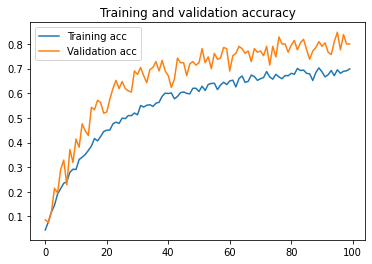

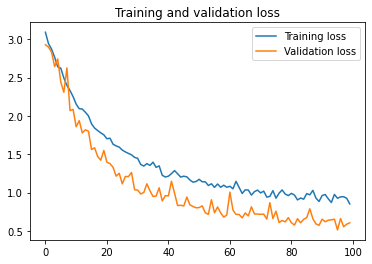

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model accuracy not perform good enough but its going in the right direction (no-overfitting)

###7.3 Evaluate Model Performance

Evaluate the model with test dataset that the model never seen before.

In [21]:
model = tf.keras.models.load_model("bestCNNmodel.h5")
akurasi = model.evaluate(test_generator)

210/210 [==============================] - 2s 7ms/step - loss: 0.5951 - accuracy: 0.8095


In [22]:
model.save(f"/content/drive/Shareddrives/Data/Model Land Use/model_CNN Acc:{akurasi[1]}.h5")

In [23]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.57      0.80      0.67        10
           5       0.91      1.00      0.95        10
           6       0.62      0.50      0.56        10
           7       1.00      0.90      0.95        10
           8       0.73      0.80      0.76        10
           9       0.69      0.90      0.78        10
          10       1.00      1.00      1.00        10
          11       0.88      0.70      0.78        10
          12       0.55      0.60      0.57        10
          13       0.73      0.80      0.76        10
          14       0.75      0.90      0.82        10
          15       1.00      1.00      1.00        10
          16       0.89      0.80      0.84        10
          17       0.88    

###7.4 Plot Confusion Matrix

Plot the confusion matrix to see where the model successfully predicts and fails to predict

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max()/2.0
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > thresh else "black")
        pass
    
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.grid(None);
    pass

<Figure size 432x288 with 0 Axes>

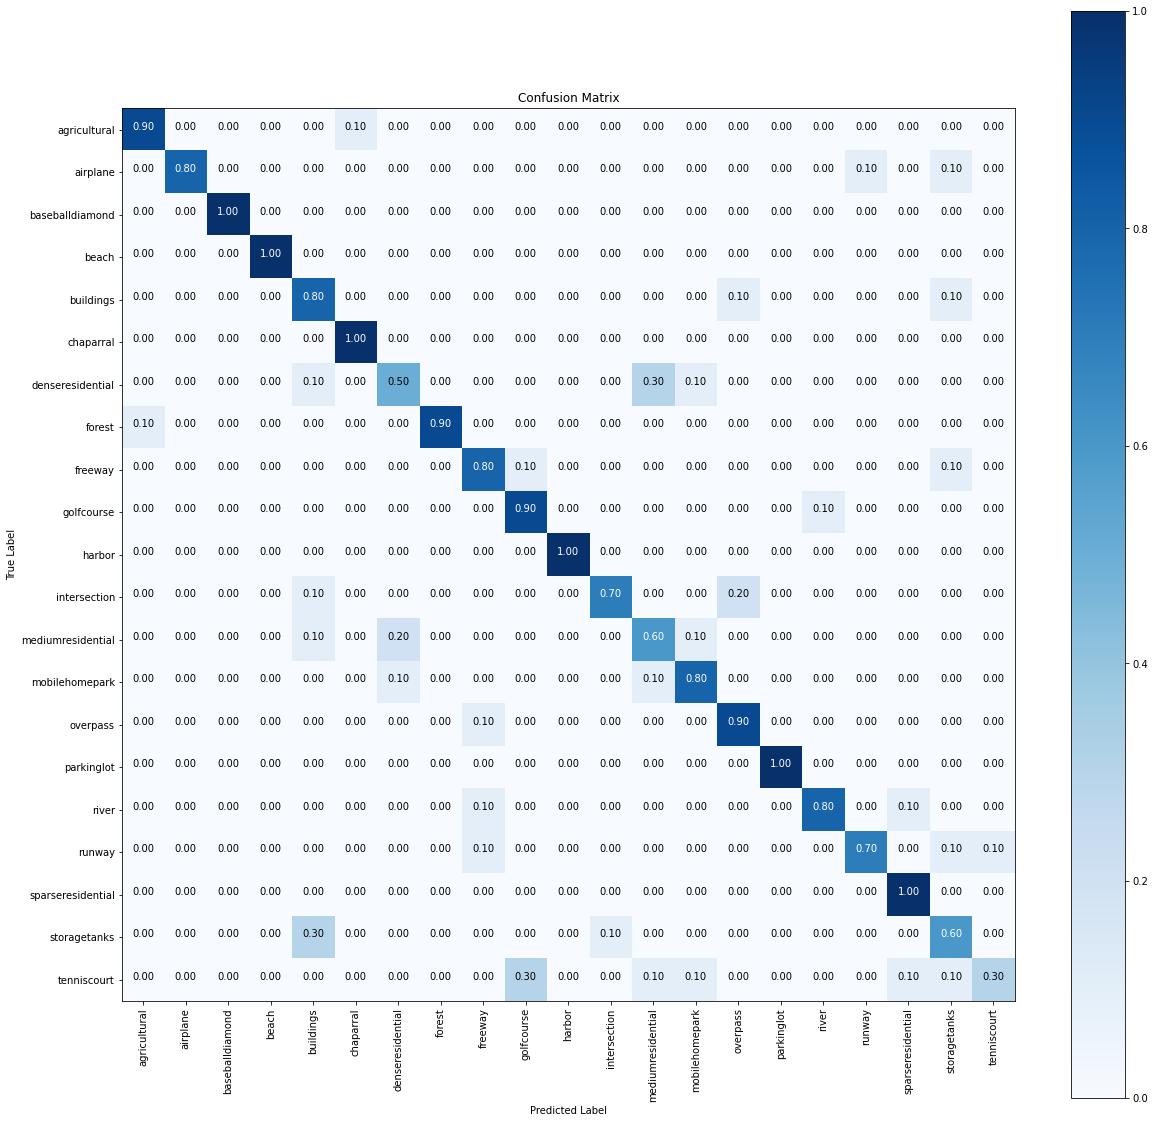

In [25]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
cnf_mat = confusion_matrix(y_test_class, y_pred_class)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_mat, classes=labels)
plt.grid(None)
plt.show();

The model performance not good enough it has 81% accuracy and fail to predict in some class. For example in tenniscourt class the model only correctly predict 3 out of 10 image.

##8. Transfer Learning with VGG16

Try to increase model performance using transfer learning with VGG16 as pretrained model

###8.1 Load PreTrained Model

In [26]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False
conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

###8.2 Build Model with Pretrained Model as Feature Extractor

Build model with pretrained model on top of the model (as feature extractor) and add some fully connected layer to adjust to the data we want to predict

In [28]:
for layer in conv_base.layers:
    layer.trainable = False

top_model = conv_base.output
top_model = tf.keras.layers.Flatten(name="flatten")(top_model)
top_model = tf.keras.layers.Dense(4096, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(1072, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
output_layer = tf.keras.layers.Dense(21, activation='softmax')(top_model)
    
# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=conv_base.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(
    train_generator,
    epochs=100,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[
            ModelCheckpoint(
                filepath='bestVGGmodel.h5',
                monitor='accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=False,
                verbose=1
            )
        ])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

The accuracy increase significantly than the CNN model

###8.3 Plot Model Accuracy and Loss

Check the plot of accuracy and loss from the model during training

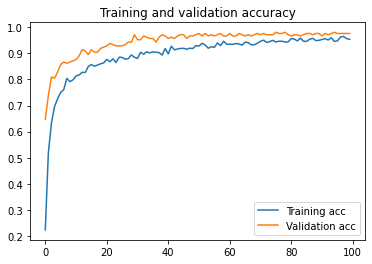

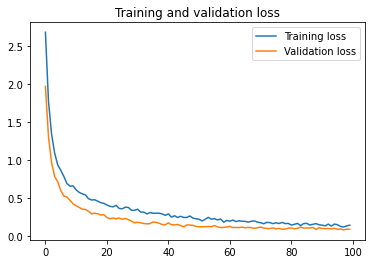

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model is pretty good and no-overfitting

###8.4 Evaluate Model Performance

Evaluate model performance

In [30]:
model = tf.keras.models.load_model("bestVGGmodel.h5")
akurasi = model.evaluate(test_generator)
model.save(f"/content/drive/Shareddrives/Data/Model Land Use/model_VGG Acc:{akurasi[1]}.h5")

210/210 [==============================] - 6s 23ms/step - loss: 0.0683 - accuracy: 0.9762


In [31]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      0.80      0.89        10
           5       1.00      1.00      1.00        10
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       0.91      1.00      0.95        10
          13       0.91      1.00      0.95        10
          14       0.91      1.00      0.95        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

###8.5 Plot Confusion Matrix

Plot the confusion matrix to see where the model successfully predicts and fails to predict

<Figure size 432x288 with 0 Axes>

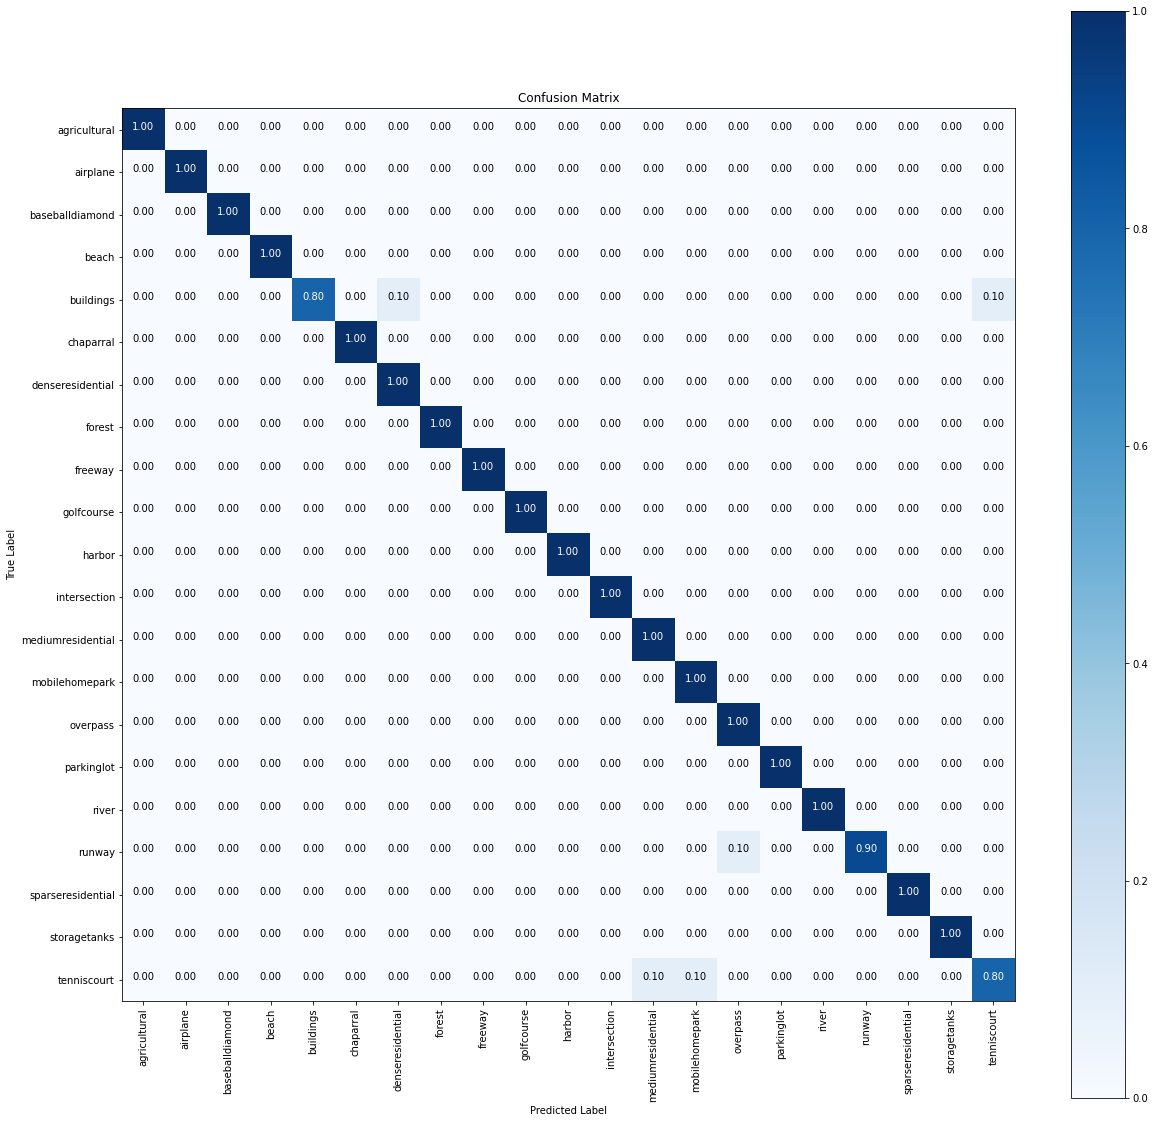

In [33]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
cnf_mat = confusion_matrix(y_test_class, y_pred_class)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_mat, classes=labels)
plt.grid(None)
plt.show();

The model perform good enough with 98% accuracy on the test set and succesfully predict 100% on some classes

##9. Transfer Learning with MobileNet

We try to compare model performance using transfer learning with MobileNet as pretrained model

###9.1 Build Model with Pretrained Model as Feature Extractor

Build model with pretrained model on top of the model (as feature extractor) and add some fully connected layer to adjust to the data we want to predict

In [34]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobile = MobileNet(weights="imagenet",include_top=False,input_shape=(150,150,3))

for layer in mobile.layers:
    layer.trainable = False

top_model = mobile.output
top_model = tf.keras.layers.Flatten(name="flatten")(top_model)
top_model = tf.keras.layers.Dense(4096, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(1072, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
output_layer = tf.keras.layers.Dense(21, activation='softmax')(top_model)
    
# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=mobile.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(
    train_generator,
    epochs=100,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[
            ModelCheckpoint(
                filepath='bestMobileNetmodel.h5',
                monitor='accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=False,
                verbose=1
            )
        ])


17235968/17225924 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32)        128       
____________________________________________________________

###9.2 Plot Model Accuracy and Loss

Check the plot of accuracy and loss from the model during training

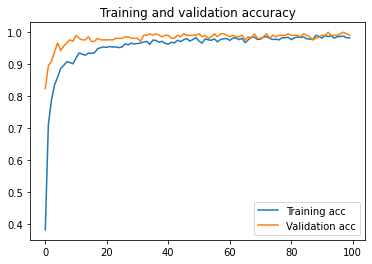

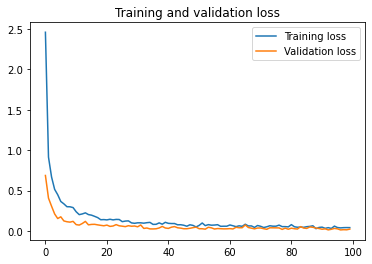

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model is very good and no-overfitting

###9.3 Evaluate Model Performance

Evaluate the model with test dataset that the model never seen before.

In [36]:
model = tf.keras.models.load_model("bestMobileNetmodel.h5")
akurasi = model.evaluate(test_generator)
model.save(f"/content/drive/Shareddrives/Data/Model Land Use/model_MobileNet Acc:{akurasi[1]}.h5")

210/210 [==============================] - 4s 13ms/step - loss: 0.0288 - accuracy: 0.9905


In [37]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      0.90      0.95        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

###9.4 Plot Confusion Matrix

Plot the confusion matrix to see where the model successfully predicts and fails to predict

<Figure size 432x288 with 0 Axes>

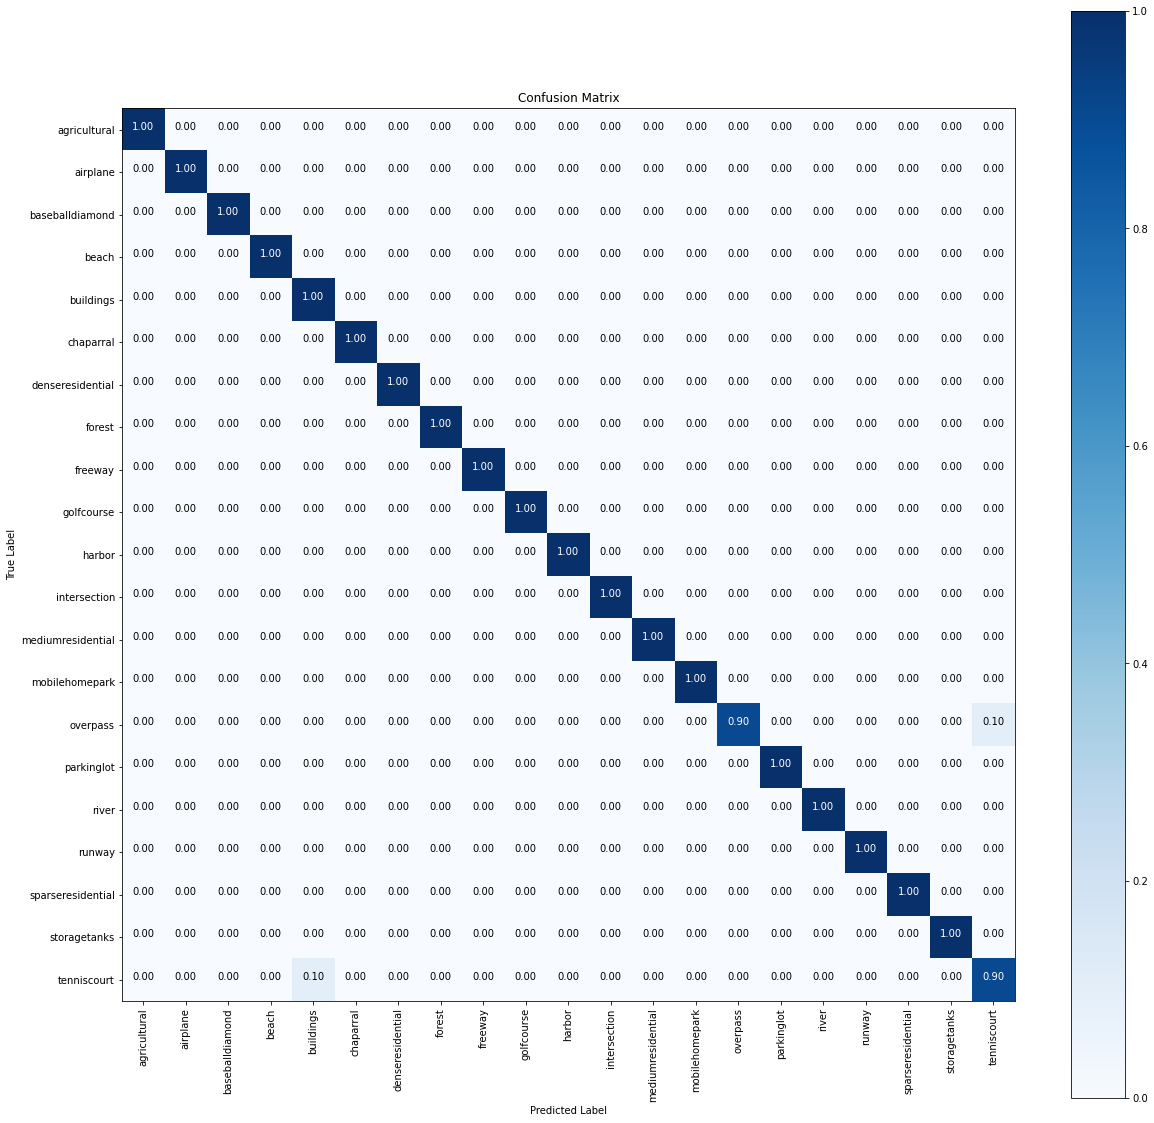

In [38]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
cnf_mat = confusion_matrix(y_test_class, y_pred_class)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_mat, classes=labels)
plt.grid(None)
plt.show();

The model perform very good with 99% accuracy on the test set and succesfully predict 100% on most classes and only fail in overpass and tenniscourt classes but still with 90% accuracy on both class

##10. Transfer Learning with InceptionV3

We try to increase model performance using transfer learning with InceptionV3 as pretrained model

###10.1 Build Model with Pretrained Model as Feature Extractor

Build model with pretrained model on top of the model (as feature extractor) and add some fully connected layer to adjust to the data we want to predict

In [39]:
from keras.applications.inception_v3 import InceptionV3
inc = InceptionV3(input_shape=(150, 150, 3),
                                    include_top=False)

for layer in inc.layers:
    layer.trainable = False

top_model = inc.output
top_model = tf.keras.layers.Flatten(name="flatten")(top_model)
top_model = tf.keras.layers.Dense(4096, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(1072, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
output_layer = tf.keras.layers.Dense(21, activation='softmax')(top_model)
    
# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=inc.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(
    train_generator,
    epochs=100,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[
            ModelCheckpoint(
                filepath='bestInceptionmodel.h5',
                monitor='accuracy',
                mode='max',
                save_best_only=True,
                save_weights_only=False,
                verbose=1
            )
        ])

#model.save(f"/content/drive/Shareddrives/Data/Model Land Use/model_Inception Acc:{history.history['accuracy'][-1]}.h5")

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
___________________________

###10.2 Plot Model Accuracy and Loss

Check the plot of accuracy and loss from the model during training

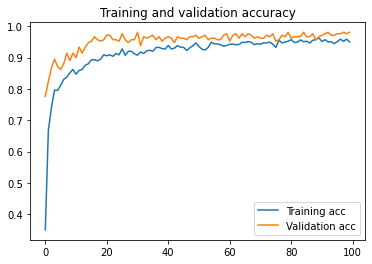

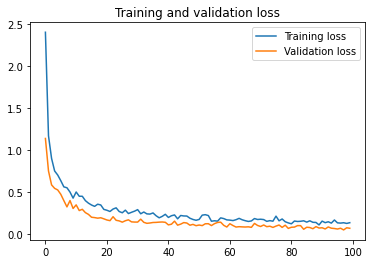

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model is pretty good and no-overfitting

###10.3 Evaluate Model Performance

Evaluate the model with test dataset that the model never seen before.

In [44]:
model = tf.keras.models.load_model("bestInceptionmodel.h5")
akurasi = model.evaluate(test_generator)
model.save(f"/content/drive/Shareddrives/Data/Model Land Use/model_Inception Acc:{akurasi[1]}.h5")

210/210 [==============================] - 9s 36ms/step - loss: 0.0457 - accuracy: 0.9905


In [45]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        10
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

###10.4 Plot Confusion Matrix

Plot the confusion matrix to see where the model successfully predicts and fails to predict

<Figure size 432x288 with 0 Axes>

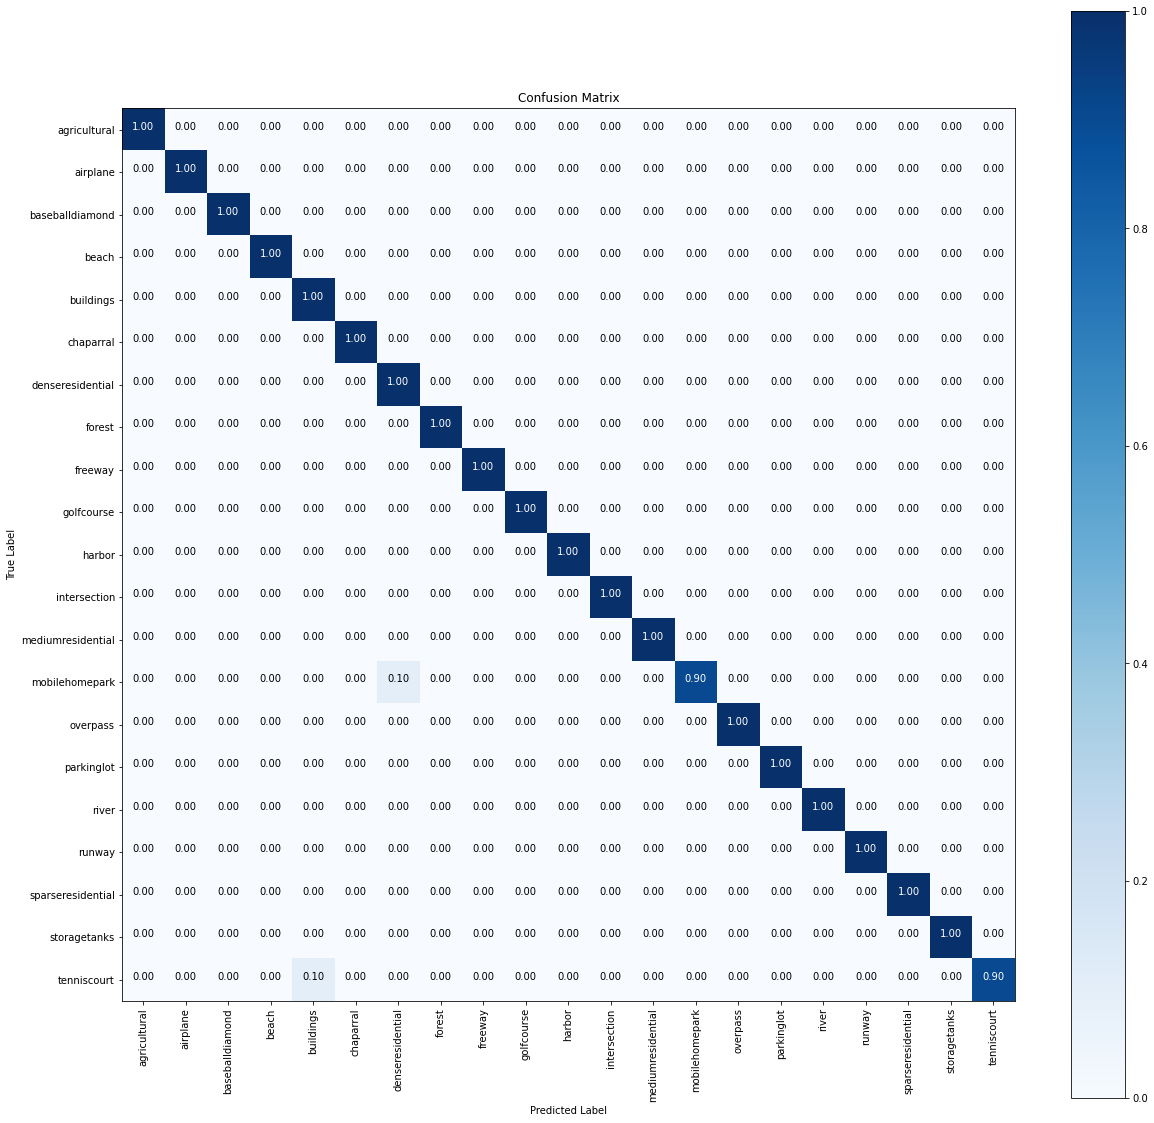

In [46]:
y_pred = model.predict(X_test)
y_pred_class = [np.argmax(y) for y in y_pred]
cnf_mat = confusion_matrix(y_test_class, y_pred_class)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_mat, classes=labels)
plt.grid(None)
plt.show();

The model perform very good with 99% accuracy on the test set and succesfully predict 100% on almost all classes almost the same as the model that uses MobileNet as the pretrained model

##11. Test with random image

###11.1 Load Model with Best Accuracy

We select the model we trained and saved in googl drive with the best accuracy

In [47]:
import re
_path = "/content/drive/Shareddrives/Data/Model Land Use"
models = os.listdir(_path)
best_acc = 0
best_model = ""

regex = r"(\d+)(?:\.(\d{1,}))"
for _model in models:
  acc = re.search(regex,_model)
  cur_acc = float(acc.group(0))
  if cur_acc > best_acc:
    best_acc = cur_acc
    best_model = _model

model= tf.keras.models.load_model(os.path.join(_path, best_model))
print(f"Model used: {best_model}")

Model used: model_MobileNet Acc:0.9904761910438538.h5


###11.2 Upload Image to Test the Model

Test the image from internet

Saving airplane.jpg to airplane.jpg


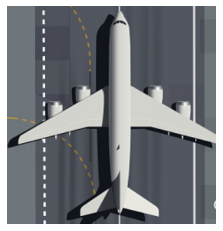

Predicted as: airplane


In [49]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  img = cv2.imread(fn)
  img = cv2.resize(img,(150,150))
  img = np.reshape(img,[1,150,150,3])
  img_arr = np.zeros((1,150,150,3))
  img_arr[0, :, :, :] = img / 255.
  y_pred = model.predict(img_arr)
  plt.imshow(imread(fn))
  plt.axis('off')
  plt.show()
  print(f"Predicted as: {class_label[np.argmax(y_pred)]}")

The model succesfully recognize it as airplane